In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df = df.drop(['Time'],axis=1)

In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


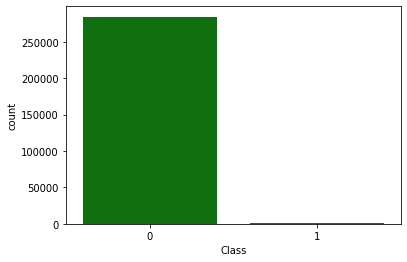

In [ ]:
import seaborn as sns
sns.countplot("Class",data=df,color="green")
#following plot shows the highly imbalanced data

#CORRELATION MATRIX
To check weather there is any correlation and to avoid multicollinearity.

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="Blues")

In [ ]:
df.hist(figsize=[20,20])
plt.show()

#Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#scale Amount column to normalize and fit data
df['Amount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [ ]:
df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3704,1.259569,-1.036109,0.963997,-0.642864,-1.555964,-0.006363,-1.291613,0.236361,-0.146226,0.695924,0.624645,-0.557275,-1.046207,-0.276393,-0.174364,1.541167,0.014235,-0.259511,0.869875,0.095556,0.347121,0.890912,-0.177254,0.017257,0.413420,-0.043028,0.029916,0.016233,-0.153325,0
237944,-4.797492,4.857198,-3.242674,-1.063174,-1.411139,-1.600863,-0.609004,1.650407,1.871837,3.291162,-0.972966,1.535362,1.634303,0.480173,0.399873,-0.372420,0.111557,-0.169820,-0.487583,1.401683,0.188502,1.138962,0.279717,-0.001720,0.030587,-0.201978,0.913872,0.635336,-0.349671,0
38344,1.430606,-0.728581,0.617990,-0.625919,-1.050452,-0.042594,-1.002180,0.005290,-0.077658,0.469519,-1.390238,-0.513766,0.571466,-0.842372,-0.180356,1.073359,0.210846,-1.001855,0.972386,0.096714,0.216635,0.796419,-0.253175,-0.382746,0.719764,0.048273,0.042954,0.010605,-0.328121,0
18987,1.289982,0.065076,0.014508,0.246545,0.032067,-0.027889,-0.143376,0.084896,0.050895,0.138862,0.229576,0.019369,-0.793457,0.611504,0.552133,0.897781,-1.027616,0.485471,0.617286,-0.113978,-0.293878,-0.949877,-0.009424,-0.876489,0.299851,0.153144,-0.043287,-0.004851,-0.328121,0
157352,2.083167,0.128433,-1.335655,0.349340,0.420063,-0.716436,0.106890,-0.385628,1.928253,-0.500151,0.293611,-1.827463,2.463310,1.759315,0.135067,-0.358742,0.158615,0.237328,-0.426003,-0.224756,0.121850,0.790584,0.010593,0.586320,0.353158,-0.483936,-0.015167,-0.053277,-0.349231,0
58751,-1.795708,-0.171154,1.747857,-0.553794,0.359907,-0.116907,-0.454698,0.785132,-0.587587,-0.984713,1.015940,1.214620,0.929066,0.243901,0.183088,0.951643,-0.814941,0.216036,-1.005877,0.189851,0.292338,0.270284,-0.064525,-0.259194,-0.143519,0.250765,-0.055447,-0.122336,-0.173435,0
17176,1.236056,0.519209,-0.073251,0.981566,0.177718,-0.846329,0.510512,-0.260361,-0.677051,0.187717,1.491288,1.391579,0.828559,0.577791,-0.118950,-0.063039,-0.616534,0.013164,0.031358,-0.086518,0.064680,0.254057,-0.168464,0.375411,0.854098,-0.316753,-0.005646,0.002622,-0.349231,0
199920,2.138905,0.043773,-1.765838,0.070071,0.674162,-0.498041,0.248669,-0.316224,0.491914,-0.018607,-1.221143,0.513037,1.166363,0.238972,0.735522,-0.015051,-0.853961,0.099287,0.056478,-0.131246,0.200532,0.758825,-0.067759,0.093949,0.419404,-0.101492,-0.019247,-0.057256,-0.349231,0
177744,-2.223012,-0.753878,1.907822,0.084153,1.433443,-0.475670,0.131101,0.254938,-0.238953,-0.638398,0.326454,0.474455,-0.342314,0.092845,-0.675636,0.777062,-1.177331,0.452787,-0.558488,-0.105904,-0.168379,-0.630236,0.336419,-0.492869,0.639041,-0.927368,-0.082426,0.198462,-0.107747,0
154016,-0.098088,0.548910,1.970972,0.181385,-0.435474,-0.036886,-0.150582,0.011582,1.587711,-0.875281,0.100069,-2.242932,2.455857,0.984290,0.200438,0.076820,0.443601,0.436193,0.417968,0.047511,0.014559,0.456193,0.055210,-0.015482,-1.107763,0.540360,0.176873,0.201003,-0.289460,0


#Feature selection
bifurcating target and feature

In [ ]:
y = df['Class']
X = df.drop(columns=['Class'])

#Splitting train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

#Using oversampling SMOTE technique 
To balance the training set 


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 



In [ ]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, counts of label '1': 227451


KeyboardInterrupt: ignored

In [ ]:
#Model 

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve,auc,roc_auc_score,roc_curve

In [40]:
def report(y_test,y_pred):
  print('The accuracy is :',accuracy_score(y_test,y_pred))
  print('The precision is :',precision_score(y_test,y_pred))
  print('The recall is :',recall_score(y_test,y_pred))
  print('The F1 Score is :',f1_score(y_test,y_pred))
  print('The AUC is :',roc_auc_score(y_test , y_pred))
  print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred))
pass

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() #Build the model
lr.fit(X_train, y_train)  #Train the model
y_pred=lr.predict(X_test) #Test the model 
print('LOGISTIC REGRESSION MODEL')
report(y_test,y_pred)

In [ ]:
#ROC curve for LR classifier
fp, tp, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fp,tp,linewidth=2)

plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive (1 - Specificity)')
plt.ylabel('True Positive (Sensitivity)')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier() #Build the model
k.fit(X_train, y_train)  #Train the model
y_pred=k.predict(X_test) #Test the model 
print('KNN MODEL')
report(y_test,y_pred)

In [ ]:
#ROC curve for KNN classifier
fp, tp, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fp,tp,linewidth=2)

plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive (1 - Specificity)')
plt.ylabel('True Positive (Sensitivity)')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier() #Build the model
tree.fit(X_train, y_train)  #Train the model
y_pred=tree.predict(X_test) #Test the model 
print('DECISION TREE MODEL')
report(y_test,y_pred)

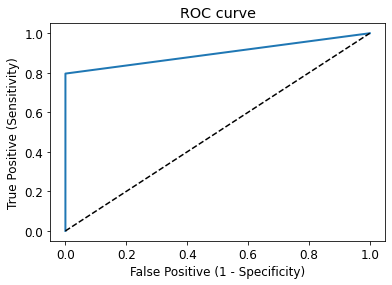

In [41]:
#ROC curve for TREE classifier
fp, tp, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fp,tp,linewidth=2)

plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive (1 - Specificity)')
plt.ylabel('True Positive (Sensitivity)')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #Build the model
rf.fit(X_train, y_train)  #Train the model
y_pred=rf.predict(X_test) #Test the model 
print('RANDOM FOREST')
report(y_test,y_pred)

RANDOM FOREST
The accuracy is : 0.9995611109160493
The precision is : 0.9620253164556962
The recall is : 0.7755102040816326
The F1 Score is : 0.8587570621468926
The AUC is : 0.8877287233126226
Confusion Matrix : 
 [[56861     3]
 [   22    76]]


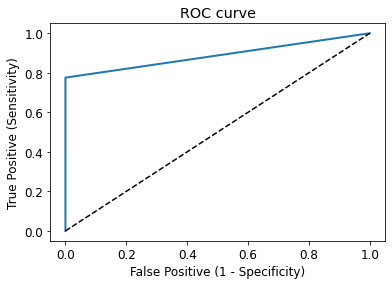

In [43]:
#ROC curve for RF classifier
fp, tp, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fp,tp,linewidth=2)

plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive (1 - Specificity)')
plt.ylabel('True Positive (Sensitivity)')
plt.show()

In [44]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() #Build the model
nv.fit(X_train, y_train)  #Train the model
y_pred=nv.predict(X_test) #Test the model 
print('NB MODEL')
report(y_test,y_pred)

NB MODEL
The accuracy is : 0.9776342122818721
The precision is : 0.059880239520958084
The recall is : 0.8163265306122449
The F1 Score is : 0.11157601115760112
The AUC is : 0.8971193711024084
Confusion Matrix : 
 [[55608  1256]
 [   18    80]]


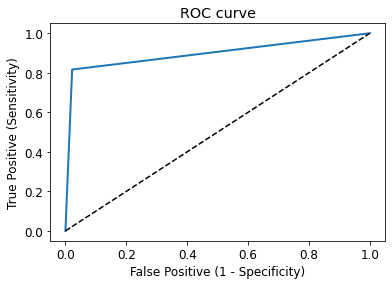

In [45]:
#ROC curve for NB classifier
fp, tp, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fp,tp,linewidth=2)

plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive (1 - Specificity)')
plt.ylabel('True Positive (Sensitivity)')
plt.show()